In [1]:
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('market_assessment.xlsx', sheet_name='US_market_size').fillna(0).drop(columns=['Unnamed: 0'])
data.head()

,Year,Market_size (billion USD)
0,2021,4.0
1,2022,6.1
2,2023,9.4
3,2024,14.4
4,2025,22.0


In [3]:
CAGR = 0.532
market_list = [4]
market_size = [round(data['Market_size (billion USD)'][0]*(1+CAGR)**i, 1) for i in range(1, data.shape[0])]
market_list.extend(market_size)
data['Market_size (billion USD)'] = market_list

In [45]:
writer = pd.ExcelWriter('market_assessment.xlsx', engine='xlsxwriter')
data.to_excel(writer, sheet_name='US_market_size')
writer.save()

In [6]:
data.columns[0]

'Year'

In [10]:
def market_size_plot(data, fig_name, title):
# Defining the plot size
  plt.figure(figsize=(10, 8))
  
  # Defining the values for x-axis, y-axis
  # and from which dataframe the values are to be picked
  plots = sns.barplot(x=data.columns[0], y=data.columns[1], data=data)
  
  # Iterrating over the bars one-by-one
  for bar in plots.patches:
    
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')
  
  # Setting the label for x-axis
  plt.xlabel(data.columns[0], size=14)
  
  # Setting the label for y-axis
  plt.ylabel(data.columns[1], size=14)
  
  # Setting the title for the graph
  plt.title(title)

  # Finally showing the plot
  plt.savefig(fig_name + '.jpg')
  plt.show()


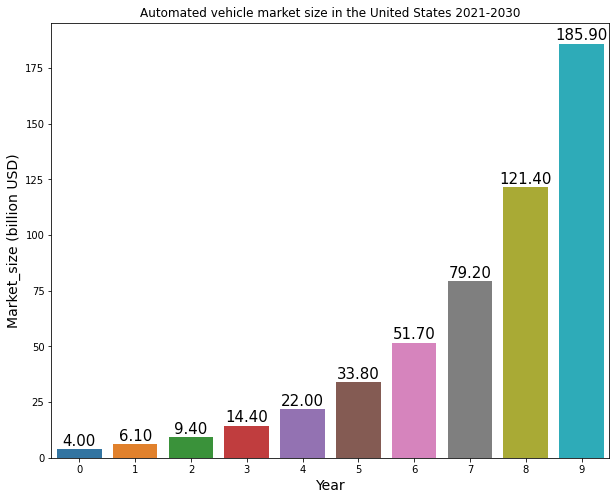

In [9]:
fig_name = 'US_market_size'
title = "Automated vehicle market size in the United States 2021-2030"
market_size_plot(data, fig_name, title)

In [11]:
fig_name = 'Global_market_size'
title =  "Automated vehicle global market size 2021-2030"
data_global = pd.read_excel('market_assessment.xlsx', sheet_name='Global_market_size').fillna(0).drop(columns=['Unnamed: 0'])
data.head()

,Year,Market_size (billion USD)
0,0,4.0
1,1,6.1
2,2,9.4
3,3,14.4
4,4,22.0


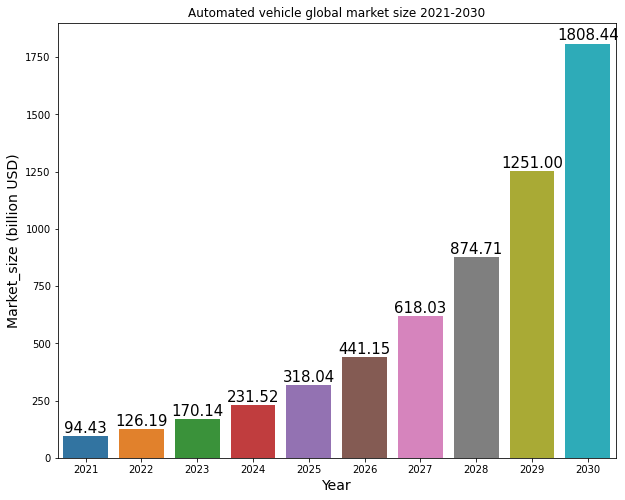

In [12]:
market_size_plot(data_global, fig_name, title)

In [62]:
use_cols = [1] + list(range(15, 21))
mpr_data = pd.read_excel('market_assessment.xlsx', sheet_name='MPR_permissive', usecols = use_cols).round(1).set_index('Year')
mpr_data.columns = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']
mpr_data.head()

,Level 0,Level 1,Level 2,Level 3,Level 4,Level 5
Year,,,,,,
2016,93.8,4.8,1.4,0.0,0.0,0.0
2020,73.4,18.8,7.8,0.0,0.0,0.0
2025,41.6,36.5,20.8,1.1,0.0,0.0
2030,22.9,41.6,32.8,2.4,0.3,0.0
2035,9.1,40.1,38.3,9.6,2.6,0.3


In [63]:
def area_plot(data, fig_name):
    # Plot stack area
    ax = data.plot.area(colormap = 'RdYlBu', figsize = (12, 8), fontsize = 16)
    ax.set_ylabel('Market Penetration Rate (%)', size=16)
    ax.set_xlabel('Year', size=16)
    plt.savefig(fig_name + '.jpg')

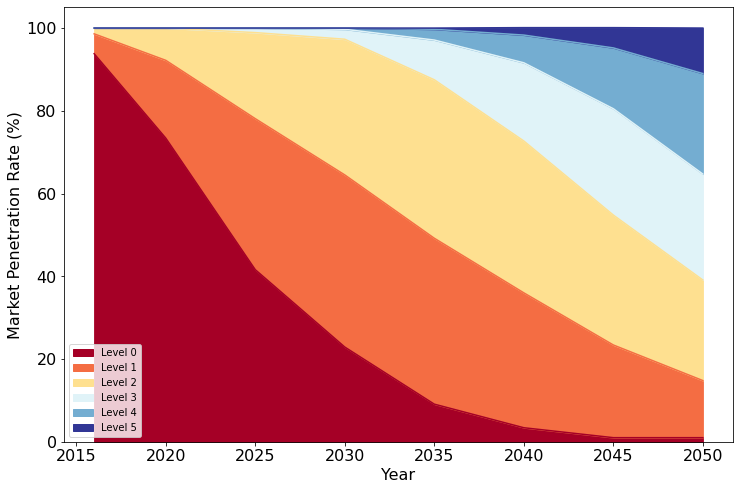

In [64]:
fig_name = 'permissive'
area_plot(mpr_data, fig_name)

In [65]:
use_cols = [0] + list(range(6, 11))
mpr_data = pd.read_excel('market_assessment.xlsx', sheet_name='MPR_optimistic', usecols = use_cols).round(1).set_index('Year')
mpr_data.columns = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4+']
mpr_data.head()

,Level 0,Level 1,Level 2,Level 3,Level 4+
Year,,,,,
2015,49.2,25.3,25.0,0.4,0.0
2020,33.7,18.9,31.4,15.7,0.3
2025,19.0,11.1,30.2,21.1,18.6
2030,8.8,5.6,19.2,14.3,52.1
2035,2.9,2.6,8.3,6.3,79.9


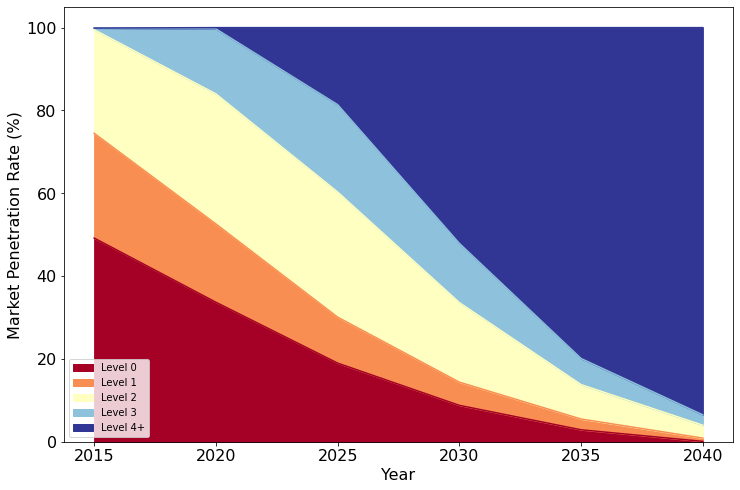

In [66]:
fig_name = 'optimistic'
area_plot(mpr_data, fig_name)